In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Clear image extraction, light balancing, noise reduction.

In [1]:
!pip install paddlepaddle paddleocr opencv-python-headless

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 MB 10.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.5/407.5 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 55.3 MB/s eta 0:00:00:00:01
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114248 sha256=fd2da56ab76dd304e8ddbd82e4fafeb264eaf64759a2b2166037056d61693aad
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a93497b11fa96fe738e
Successfully built fire


In [11]:
import pytesseract
import cv2
from PIL import Image

# Set up the path to your image folder
image_folder = '/kaggle/input/image-1/'
sample_image_name = 'B07SRT4LQM.MAIN__26436.jpg'  # Example image
sample_image_path = image_folder + sample_image_name

# Load the image using OpenCV
img = cv2.imread(sample_image_path)

# Check if the image was loaded correctly
if img is None:
    print("Error: Image not loaded. Please check the file path.")
else:
    # Convert OpenCV image (NumPy array) to PIL image
    pil_img = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    # Use pytesseract to extract text from the image
    text = pytesseract.image_to_string(pil_img)

    # Print the extracted text
    print("Extracted Text:")
    print(text)


Extracted Text:
dé
PANTENE

HAIR SCIENCE

SA
SOT

Tish Ranh y hel Solon ien
Goreme ona

 

SHAMPOO

ke 21015245,



In [12]:
!pip install spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 1.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 48.6 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.46.0 requires cloudpickle~=2.2.1, but you have cloudpickle 3.0.0 which is incompatible.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.8 which is incompatible.
apache-beam 2.46.0 requires numpy<1.25.0,>=1.14.3, but you have numpy 2.0.2 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 17.0.0 which is incompatible.
catboost 1.2.7 requires numpy<2.0,>=1.16.0, but you have numpy 2.0.2 which is incompatible.
ge

In [17]:
# Define a list of common brand names for matching
brand_list = ["LAYS", "PEPSI", "COCA COLA", "XYZ Corporation", "Nike", "Adidas"]

# Sample extracted text from the image
extracted_text = """
Extracted Text:
dé
PANTENE

HAIR SCIENCE

SA
SOT

Tish Ranh y hel Solon ien
Goreme ona

 

SHAMPOO

ke 21015245,
"""

# Perform keyword matching
brand_names = [brand for brand in brand_list if brand.lower() in extracted_text.lower()]

# Print the identified brand names
print("Identified Brand Names:", brand_names)


Identified Brand Names: []


In [18]:
!pip install transformers
!pip install datasets


In [19]:
from transformers import pipeline

# Load the pre-trained NER model from Hugging Face
ner_pipeline = pipeline("ner", model="dbmdz/bert-large-cased-finetuned-conll03-english")

# Sample extracted text from the image
extracted_text = """
LAYS is a popular snack brand and is owned by PepsiCo.
"""

# Perform NER using the pipeline
ner_results = ner_pipeline(extracted_text)

# Print the NER results
print(ner_results)


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

[{'entity': 'I-ORG', 'score': 0.9848489, 'index': 1, 'word': 'LA', 'start': 1, 'end': 3}, {'entity': 'I-ORG', 'score': 0.92379445, 'index': 2, 'word': '##Y', 'start': 3, 'end': 4}, {'entity': 'I-ORG', 'score': 0.91873366, 'index': 3, 'word': '##S', 'start': 4, 'end': 5}, {'entity': 'I-ORG', 'score': 0.9993309, 'index': 13, 'word': 'P', 'start': 47, 'end': 48}, {'entity': 'I-ORG', 'score': 0.9904131, 'index': 14, 'word': '##ep', 'start': 48, 'end': 50}, {'entity': 'I-ORG', 'score': 0.99720925, 'index': 15, 'word': '##si', 'start': 50, 'end': 52}, {'entity': 'I-ORG', 'score': 0.99430275, 'index': 16, 'word': '##C', 'start': 52, 'end': 53}, {'entity': 'I-ORG', 'score': 0.9963108, 'index': 17, 'word': '##o', 'start': 53, 'end': 54}]


In [20]:
# Filter out only organizations (which can include brand names)
brand_names = [entity['word'] for entity in ner_results if entity['entity'] == 'B-ORG']

# Print identified brand names
print("Identified Brand Names:", brand_names)


Identified Brand Names: []


In [21]:
import cv2
from transformers import pipeline
import pytesseract

# Load the image and extract text using pytesseract
image_folder = '/kaggle/input/image-1/'
sample_image_name = 'B07SRT4LQM.MAIN__26436.jpg'  # Example image
sample_image_path = image_folder + sample_image_name

# Load the image using OpenCV
img = cv2.imread(sample_image_path)

# Use pytesseract to extract text from the image
extracted_text = pytesseract.image_to_string(img)

# Clean the extracted text
extracted_text_cleaned = extracted_text.strip().replace("\n", " ")

# Print the cleaned extracted text
print("Cleaned Extracted Text:", extracted_text_cleaned)

# Load the Hugging Face NER pipeline with a specific model
ner_pipeline = pipeline("ner", model="dslim/bert-base-NER")  # Change model if needed

# Run NER on the cleaned text
ner_results = ner_pipeline(extracted_text_cleaned)

# Filter out both 'B-ORG' and 'I-ORG' for organization entities
brand_names = [entity['word'] for entity in ner_results if 'ORG' in entity['entity']]

# Print all detected entities for debugging
print("NER Results:", ner_results)

# Print identified brand names
print("Identified Brand Names:", brand_names)


Cleaned Extracted Text: é PANTENE  HAIR SCIENCE  SA SOT  TNs Arh cle) So elon iee Goreme     SHAMPOO  ke 21015245,


config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

NER Results: [{'entity': 'B-PER', 'score': 0.6602863, 'index': 30, 'word': 'Gore', 'start': 58, 'end': 62}]
Identified Brand Names: []


In [26]:

import cv2
from transformers import pipeline
import pytesseract
import re

# Load the image and extract text using pytesseract
image_folder = '/kaggle/input/image-1/'
sample_image_name = 'B07SRT4LQM.MAIN__26436.jpg'  # Example image
sample_image_path = image_folder + sample_image_name

# Load the image using OpenCV
img = cv2.imread(sample_image_path)

# Use pytesseract to extract text from the image
extracted_text = pytesseract.image_to_string(img)

# Clean the extracted text
extracted_text_cleaned = extracted_text.strip().replace("\n", " ")

# Print the cleaned extracted text
print("Cleaned Extracted Text:", extracted_text_cleaned)

# Load the Hugging Face NER pipeline with a specific model
ner_pipeline = pipeline("ner", model="dslim/bert-base-NER")  # Change model if needed

# Run NER on the cleaned text
ner_results = ner_pipeline(extracted_text_cleaned)

# Filter out both 'B-ORG' and 'I-ORG' for organization entities
brand_names = [entity['word'] for entity in ner_results if 'ORG' in entity['entity']]

# If NER doesn't yield results, apply regex for manual extraction
if not brand_names:
    # Using regex to extract potential brand names
    # Look for capitalized words, possibly followed by more capitalized words
    regex_pattern = r'\b([A-Z][a-zA-Z]*\s?[A-Z][a-zA-Z]*)+\b'
    brand_names = re.findall(regex_pattern, extracted_text_cleaned)

# Print all detected entities for debugging
print("NER Results:", ner_results)

# Print identified brand names
print("Identified Brand Names:", brand_names)
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Cleaned Extracted Text: é PANTENE  HAIR SCIENCE  SA SOT  TNs Arh cle) So elon iee Goreme     SHAMPOO  ke 21015245,
NER Results: [{'entity': 'B-PER', 'score': 0.6602863, 'index': 30, 'word': 'Gore', 'start': 58, 'end': 62}]
Identified Brand Names: ['PANTENE', 'HAIR SCIENCE', 'SA SOT', 'TNs Arh', 'SHAMPOO']


In [27]:
# List of known brand names (expanded with more categories)
known_brands = {
    # Food Brands
    "PANTENE", "NIVEA", "DOVE", "COLGATE", "LAYS", "COKE", "PEPSI", 
    "KRAFT", "NESTLE", "GENERAL MILLS", "UNILEVER", "PROCTER & GAMBLE", 
    "CAMPBELL'S", "HEINZ", "MARS", "HERSHEY'S", "KIND", "OREO", 
    "TROPICANA", "CARR'S", "KELLOGG'S", "SNICKERS", "TWIX", "M&M'S", 
    "JELL-O", "PILLSBURY", "BISQUICK", "DUNKIN'", "DANONE", "YOPLAIT", 
    "BREEZE", "FLAVORS", "SWISS MISS", "LU", "BISCUITS", 

    # Beverage Brands
    "BUDWEISER", "CORONA", "MILLER", "FANTA", "SPRITE", "DIET COKE", 
    "RED BULL", "STARBUCKS", "PEET'S COFFEE", "TASSIMO", "DUNKIN'", 
    "TETLEY", "LIPTON", "NESTEA", "Coconut water", "Coco-Cola", 

    # Hair Care Brands
    "L'OREAL", "GARNIER", "HEAD & SHOULDERS", "HERBAL ESSENCES", 
    "SCHWARZKOPF", "BOTH", "AUSSIE", "TRESemmé", "OGX", "DOVE", 
    "JOICO", "KERASTASE", "BIOLAGE", "MATRIX", "MOROCCANOIL",

    # Skin Care Brands
    "OLAY", "NEUTROGENA", "AVEENO", "CETAPHIL", "NIVEA", "COSRX", 
    "THE ORDINARY", "LA ROCHE-POSAY", "SK-II", "POND'S", "EUCERIN", 
    "KIEHL'S", "CLINIQUE", "ELIZABETH ARDEN", "LANCOME", "LUSH",

    # Makeup Brands
    "MAYBELLINE", "L'OREAL", "REVLON", "NYX", "MAC", "ESTEE LAUDER", 
    "NARS", "URBAN DECAY", "TOO FACED", "FENTY BEAUTY", "HUDA BEAUTY", 
    "ANASTASIA BEVERLY HILLS", "BH COSMETICS", "TARTE", "MORPHE", 

    # Electronics Brands
    "APPLE", "SAMSUNG", "NOKIA", "SONY", "LG", "XIAOMI", "ONEPLUS", 
    "MICROSOFT", "GOOGLE", "AMAZON", "ASUS", "DELL", "LENOVO", 
    "HP", "Acer", "TOSHIBA", "Razer", "NVIDIA", "AMD", "BOSE", 
    "JBL", "SANDISK", "SEAGATE", "PHILIPS", "LOGITECH", "FITBIT"
}

# Extract only the brands from the identified names
identified_brands = [name for name in brand_names if name in known_brands]

# Print identified brands
print("Identified Brand Names from Known List:", identified_brands)


Identified Brand Names from Known List: ['PANTENE']


# To extract the number of products from the image,

In [28]:
!pip install opencv-python
!pip install opencv-python-headless
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113


Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-10-17 Python-3.10.14 torch-2.4.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Detected Product Counts:
Series([], Name: count, dtype: int64)


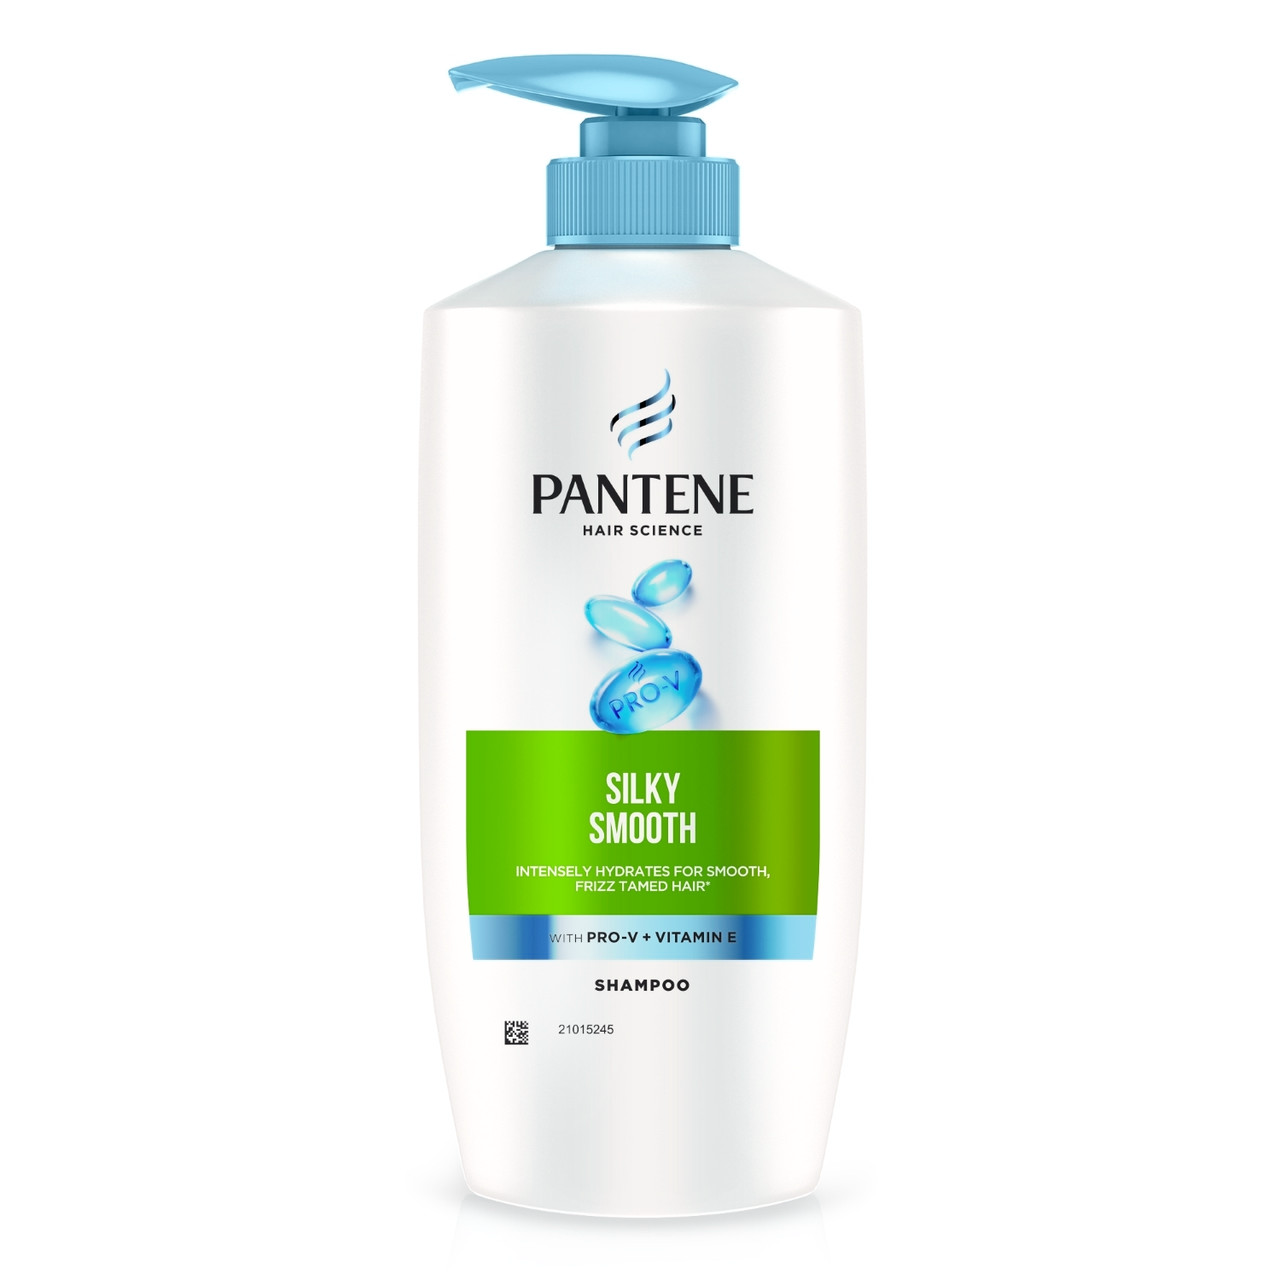

In [32]:

# Load the YOLOv5 model (you can use any other model as per your preference)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # Use 'yolov5m' or 'yolov5l' for larger models

# Set up the path to your image folder
image_folder = '/kaggle/input/image-1/'
sample_image_name = 'B07SRT4LQM.MAIN__26436.jpg'  # Example image
sample_image_path = image_folder + sample_image_name

# Load the image using OpenCV
img = cv2.imread(sample_image_path)

# Perform inference
results = model(img)

# Parse results
products_detected = results.pandas().xyxy[0]  # Get the predictions in a pandas DataFrame

# Count unique product classes detected
product_counts = products_detected['name'].value_counts()

# Print the counts of products detected
print("Detected Product Counts:")
print(product_counts)

# Optional: Visualize the detections on the image
results.show()  # Display the image with detections


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-10-17 Python-3.10.14 torch-2.4.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


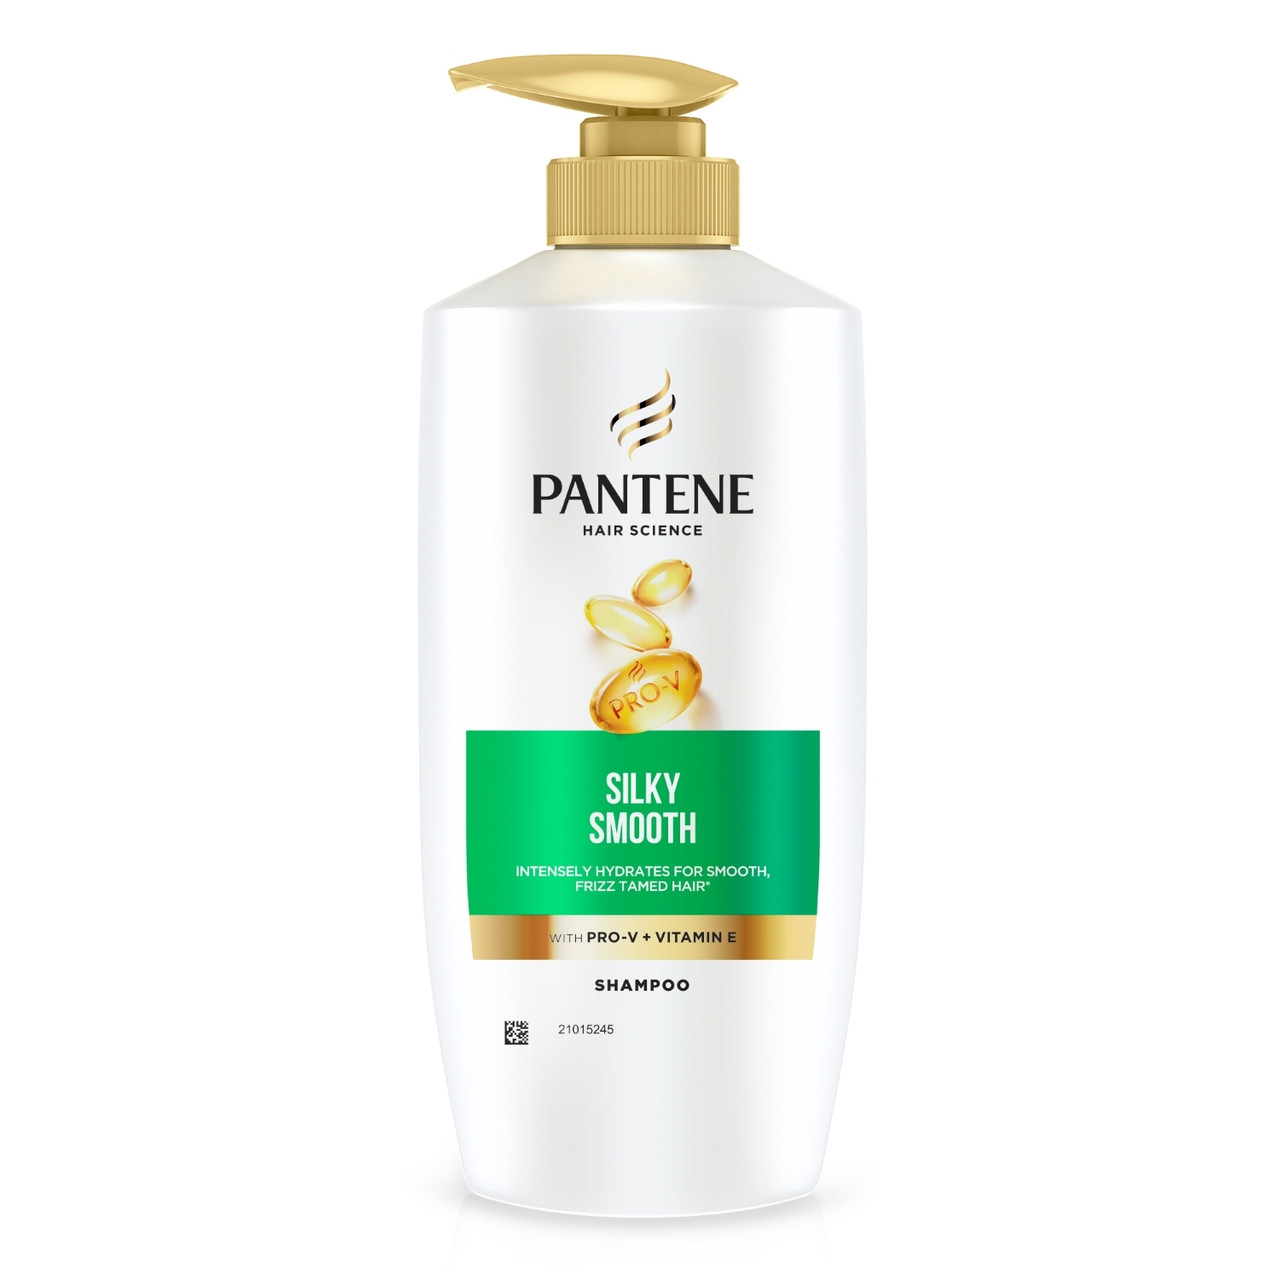

Empty DataFrame
Columns: [xmin, ymin, xmax, ymax, confidence, class, name]
Index: []
Detected Product Counts:
Series([], Name: count, dtype: int64)


In [34]:
import torch
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = '/kaggle/input/image-1/B07SRT4LQM.MAIN__26436.jpg'
img = cv2.imread(image_path)

# Display the image to ensure it's loaded correctly
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Remove axis
plt.show()

# Load the YOLOv5 model (you can use a custom-trained model if needed)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Perform inference on the image
results = model(image_path)

# Display the detection results
results.show()

# Get the detected objects as a pandas DataFrame
detections_df = results.pandas().xyxy[0]

# Display the detected objects
print(detections_df)

# Filter and count specific objects (in this case, products like bottles)
# If you have a specific category, like 'bottle' or 'shampoo', you can filter by 'name'
product_counts = detections_df['name'].value_counts()

print("Detected Product Counts:")
print(product_counts)



# Option 1: Using a pre-trained model on Hugging Face (Open Images)

In [43]:
from transformers import DetrImageProcessor, DetrForObjectDetection
from PIL import Image, ImageDraw
import torch
import matplotlib.pyplot as plt

# Load pre-trained model for object detection
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")

# Load the image
image_path = '/kaggle/input/image-1/B07SRT4LQM.MAIN__26436.jpg'  # Change this to the correct path if needed
image = Image.open(image_path)

# Preprocess the image
inputs = processor(images=image, return_tensors="pt")

# Perform object detection
outputs = model(**inputs)

# Get results
target_sizes = torch.tensor([image.size[::-1]])  # Width, height
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes)[0]

# Visualize results
def plot_boxes(img, boxes, scores, labels, threshold=0.7):
    img = img.copy()
    draw = ImageDraw.Draw(img)  # Initialize ImageDraw object
    for score, label, box in zip(scores, labels, boxes):
        if score > threshold:
            # Draw bounding boxes and labels on the image
            draw.rectangle(box.tolist(), outline="red", width=3)
            draw.text((box[0], box[1]), f"{label}: {round(score.item(), 2)}", fill="red")
    plt.imshow(img)
    plt.axis("off")
    plt.show()

# Display the bounding boxes
plot_boxes(image, results['boxes'], results['scores'], results['labels'])


Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


# Option 2: TensorFlow Object Detection API + Google Open Images

In [50]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/kaggle/input/image-1/B07SRT4LQM.MAIN__26436.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(gray, (11, 11), 0)
canny = cv2.Canny(blur, 30, 150, 3)
dilated = cv2.dilate(canny, (1, 1), iterations=0)

(cnt, hierarchy) = cv2.findContours(
    dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)


print("coins in the image : ", len(cnt))


coins in the image :  81


Detected Text: PANTENE


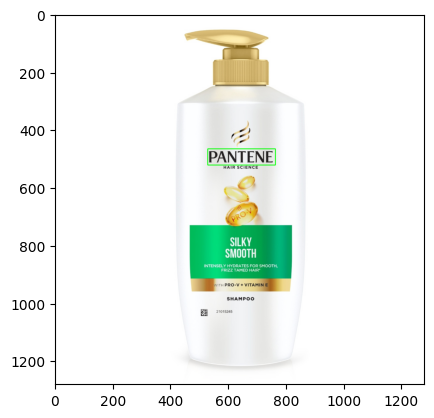

Detected Text: HAIR SCIENCE


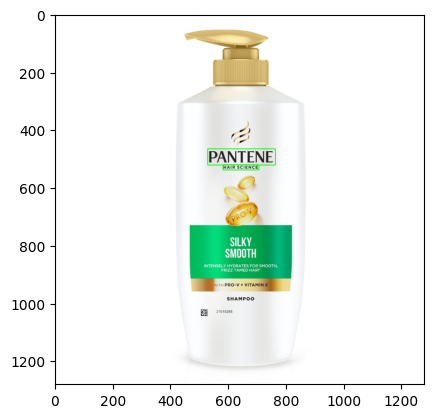

Detected Text: SILKY


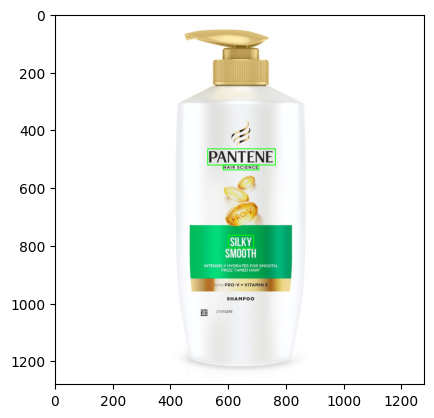

Detected Text: SMOOTH


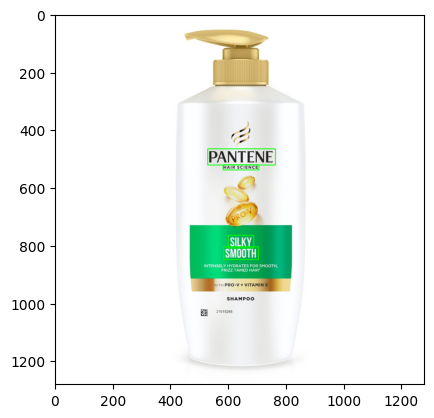

Detected Text: INTENSELY HYDRATES FOR SMOOTH;


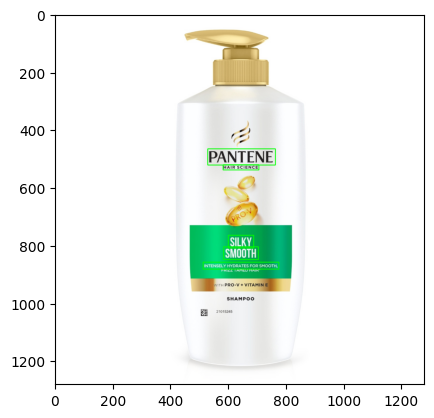

Detected Text: FRIZZ TAMED HAIR"


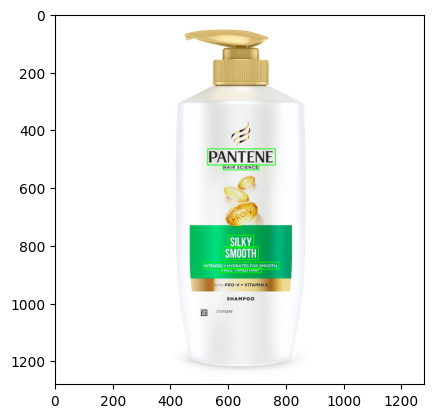

Detected Text: With


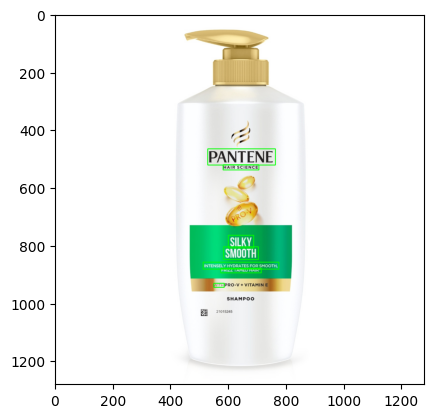

Detected Text: PRO-V


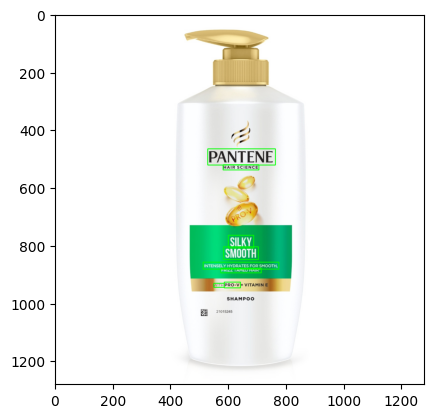

Detected Text: VITAMIN E


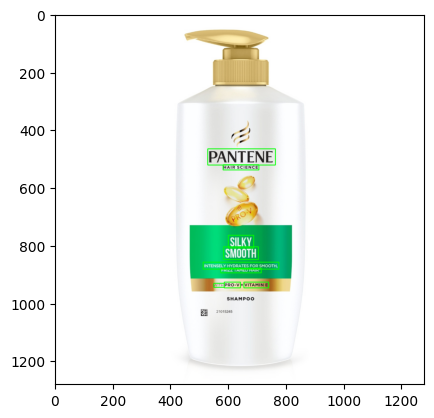

Detected Text: SHAMPOO


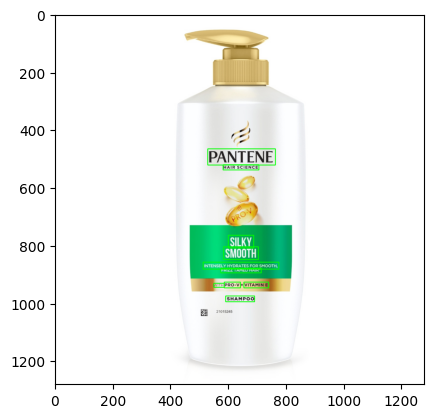

Detected Text: 21015245


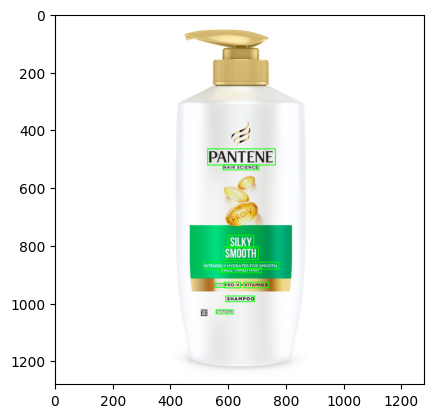

Detected Text: PRO-


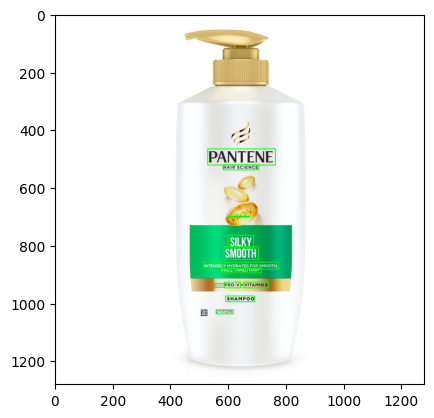

In [1]:
import easyocr
import matplotlib.pyplot as plt
import cv2

# Load the image
image_path = '/kaggle/input/image-1/B07SRT4LQM.MAIN__26436.jpg'
image = cv2.imread(image_path)

# Initialize EasyOCR Reader
reader = easyocr.Reader(['en'])  # Specify language

# Perform OCR
result = reader.readtext(image_path)

# Display the results
for detection in result:
    text = detection[1]
    print(f'Detected Text: {text}')
    
    # Display OCR result on image
    top_left = tuple(map(int, detection[0][0]))
    bottom_right = tuple(map(int, detection[0][2]))
    image = cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()


In [2]:
import easyocr
import cv2

# Initialize the EasyOCR Reader
reader = easyocr.Reader(['en'])  # Specify language

# Predefined dictionary of brands
brand_dict = {
    "Dove": "Dove",
    "Nivea": "Nivea",
    "L'Oreal": "L'Oreal",
    "Patanjali": "Patanjali",
    "Colgate": "Colgate",
    # Add more brand mappings here...
}

# Predefined dictionary of categories
category_dict = {
    "skincare": ["cream", "lotion", "sunscreen", "moisturizer"],
    "personal care": ["shampoo", "soap", "toothpaste", "deodorant"],
    "household": ["cleaner", "oil", "detergent", "spray"],
    # Add more categories and associated keywords here...
}

def categorize_text(text, category_dict):
    """
    Categorize text based on keywords in category_dict.

    :param text: Extracted text string
    :param category_dict: Dictionary of categories with associated keywords
    :return: The identified category or None
    """
    for category, keywords in category_dict.items():
        for keyword in keywords:
            if keyword.lower() in text.lower():
                return category
    return None

def extract_text_and_categorize(image_path, brand_dict, category_dict):
    """
    Extract text from an image and categorize into brand, category, and other details.
    
    :param image_path: Path to the input image
    :param brand_dict: Dictionary with brand names to identify
    :param category_dict: Dictionary with product categories and keywords
    :return: None (Prints extracted brand, category, and other details)
    """
    # Load the image
    image = cv2.imread(image_path)

    # Perform OCR
    results = reader.readtext(image_path)

    # Initialize variables to hold the brand, category, and other details
    extracted_brand = None
    extracted_category = None
    other_details = []

    # Iterate over the OCR results
    for detection in results:
        text = detection[1]
        print(f'Detected Text: {text}')  # Print detected text

        # Check if the text contains a known brand
        for brand in brand_dict:
            if brand.lower() in text.lower():  # Case insensitive matching
                extracted_brand = brand_dict[brand]

        # Check if the text contains a known category
        if extracted_category is None:
            extracted_category = categorize_text(text, category_dict)

        # If not a brand or category, consider as other details
        if not extracted_brand and not extracted_category:
            other_details.append(text)

    # Print the identified brand, category, and other details
    print("\n--- Extracted Information ---")
    if extracted_brand:
        print(f'Brand: {extracted_brand}')
    else:
        print('Brand: Not identified')

    if extracted_category:
        print(f'Category: {extracted_category}')
    else:
        print('Category: Not identified')

    if other_details:
        print(f'Other Details: {", ".join(other_details)}')
    else:
        print('Other Details: Not available')

# Path to the image you want to test
test_image_path = '/kaggle/input/brand-names/DOVE image.jpg'  # Update this to your image path

# Call the function
extract_text_and_categorize(test_image_path, brand_dict, category_dict)


Detected Text: 14
Detected Text: Dove
Detected Text: OMMEND
Detected Text: BARS
Detected Text: white
Detected Text: beauty bar with deep moisture
Detected Text: moisturizing creralm
Detected Text: 14-NET WT 3.75 02 (106g) BARS - TOTAL NET WT 52.5 02 (3.2 LB) / 1.48kg
Detected Text: Matolog

--- Extracted Information ---
Brand: Dove
Category: Not identified
Other Details: 14


In [3]:
import easyocr
import cv2

# Initialize the EasyOCR Reader
reader = easyocr.Reader(['en'])

# Predefined dictionary of brands
brand_dict = {
    "Dove": "Dove",
    "Nivea": "Nivea",
    "L'Oreal": "L'Oreal",
    "Patanjali": "Patanjali",
    "Colgate": "Colgate",
    # Add more brand mappings here...
}

# Predefined dictionary of categories
category_dict = {
    "skincare": ["moisturizing cream", "moisturizer", "lotion", "sunscreen"],
    "personal care": ["shampoo", "soap", "deodorant", "toothpaste", "beauty bar"],
    "household": ["cleaner", "detergent", "spray", "cooking oil"],
    # Add more categories and associated keywords here...
}

def categorize_text(text, category_dict):
    """
    Categorize text based on keywords in category_dict.

    :param text: Extracted text string
    :param category_dict: Dictionary of categories with associated keywords
    :return: The identified category or None
    """
    for category, keywords in category_dict.items():
        for keyword in keywords:
            if keyword.lower() in text.lower():
                return category
    return None

def extract_text_and_categorize(image_path, brand_dict, category_dict):
    """
    Extract text from an image and categorize into brand, category, and other details.
    
    :param image_path: Path to the input image
    :param brand_dict: Dictionary with brand names to identify
    :param category_dict: Dictionary with product categories and keywords
    :return: None (Prints extracted brand, category, and other details)
    """
    # Load the image
    image = cv2.imread(image_path)

    # Perform OCR
    results = reader.readtext(image_path)

    # Initialize variables to hold the brand, category, and other details
    extracted_brand = None
    extracted_category = None
    other_details = []

    # Iterate over the OCR results
    for detection in results:
        text = detection[1]
        print(f'Detected Text: {text}')  # Print detected text

        # Check if the text contains a known brand
        for brand in brand_dict:
            if brand.lower() in text.lower():  # Case insensitive matching
                extracted_brand = brand_dict[brand]

        # Check if the text contains a known category
        if not extracted_category:
            extracted_category = categorize_text(text, category_dict)

        # If text contains weight/size information, consider it as "other details"
        if 'net wt' in text.lower() or any(char.isdigit() for char in text):
            other_details.append(text)
        elif not extracted_category:  # If it's neither category nor brand
            other_details.append(text)

    # Print the identified brand, category, and other details
    print("\n--- Extracted Information ---")
    if extracted_brand:
        print(f'Brand: {extracted_brand}')
    else:
        print('Brand: Not identified')

    if extracted_category:
        print(f'Category: {extracted_category}')
    else:
        print('Category: Not identified')

    if other_details:
        print(f'Other Details: {", ".join(other_details)}')
    else:
        print('Other Details: Not available')

# Path to the image you want to test
test_image_path = '/kaggle/input/brand-names/DOVE image.jpg'  # Update this to your image path

# Call the function
extract_text_and_categorize(test_image_path, brand_dict, category_dict)


Detected Text: 14
Detected Text: Dove
Detected Text: OMMEND
Detected Text: BARS
Detected Text: white
Detected Text: beauty bar with deep moisture
Detected Text: moisturizing creralm
Detected Text: 14-NET WT 3.75 02 (106g) BARS - TOTAL NET WT 52.5 02 (3.2 LB) / 1.48kg
Detected Text: Matolog

--- Extracted Information ---
Brand: Dove
Category: personal care
Other Details: 14, Dove, OMMEND, BARS, white, 14-NET WT 3.75 02 (106g) BARS - TOTAL NET WT 52.5 02 (3.2 LB) / 1.48kg


In [7]:
import easyocr
import cv2
import difflib

# Initialize the EasyOCR Reader
reader = easyocr.Reader(['en'])

# Predefined dictionary of brands (improve by adding more brands)
brand_dict = {
    "Dove": "Dove",
    "Nivea": "Nivea",
    "L'Oreal": "L'Oreal",
    "Patanjali": "Patanjali",
    "Colgate": "Colgate",
    # Add more brand mappings here...
}

# Predefined dictionary of categories
category_dict = {
    "skincare": ["moisturizing cream", "moisturizer", "hydrating", "lotion", "sunscreen"],
    "personal care": ["shampoo", "soap", "deodorant", "toothpaste", "beauty bar"],
    "household": ["cleaner", "detergent", "spray", "cooking oil"],
    # Add more categories and associated keywords here...
}

def clean_text(text):
    """
    Clean text by removing non-alphabetical characters and making it lowercase.
    """
    return ''.join(e for e in text if e.isalnum()).lower()

def approximate_match(text, known_values):
    """
    Use approximate matching to find the closest match from a list of known values.
    """
    cleaned_text = clean_text(text)
    closest_match = difflib.get_close_matches(cleaned_text, known_values, n=1, cutoff=0.6)
    return closest_match[0] if closest_match else None

def categorize_text(text, category_dict):
    """
    Categorize text based on keywords in category_dict.
    """
    for category, keywords in category_dict.items():
        for keyword in keywords:
            if keyword.lower() in text.lower():
                return category
    return None

def extract_text_and_categorize(image_path, brand_dict, category_dict):
    """
    Extract text from an image and categorize into brand, category, and other details.
    """
    # Load the image
    image = cv2.imread(image_path)

    # Perform OCR
    results = reader.readtext(image_path)

    # Initialize variables to hold the brand, category, and other details
    extracted_brand = None
    extracted_category = None
    other_details = []

    # Prepare brand names for approximate matching
    known_brands = list(brand_dict.keys())

    # Iterate over the OCR results
    for detection in results:
        text = detection[1]
        print(f'Detected Text: {text}')  # Print detected text

        # Check if the text contains a known brand (using approximate matching)
        if not extracted_brand:
            matched_brand = approximate_match(text, known_brands)
            if matched_brand:
                extracted_brand = brand_dict[matched_brand]

        # Check if the text contains a known category
        if not extracted_category:
            extracted_category = categorize_text(text, category_dict)

        # If text contains weight/size information or other important details, consider it as "other details"
        if 'net wt' in text.lower() or any(char.isdigit() for char in text):
            other_details.append(text)
        elif not extracted_category:  # If it's neither category nor brand, it's added to other details
            other_details.append(text)

    # Print the identified brand, category, and other details
    print("\n--- Extracted Information ---")
    if extracted_brand:
        print(f'Brand: {extracted_brand}')
    else:
        print('Brand: Not identified')

    if extracted_category:
        print(f'Category: {extracted_category}')
    else:
        print('Category: Not identified')

    if other_details:
        print(f'Other Details: {", ".join(other_details)}')
    else:
        print('Other Details: Not available')

# Path to the image you want to test
test_image_path = '/kaggle/input/brand-names/loreal.jpg'  # Update this to your image path

# Call the function
extract_text_and_categorize(test_image_path, brand_dict, category_dict)


Detected Text: LOREAL?
Detected Text: PARis
Detected Text: REVITALIFT
Detected Text: MOISTURIZER / HYDRATANT

--- Extracted Information ---
Brand: L'Oreal
Category: skincare
Other Details: LOREAL?, PARis, REVITALIFT


In [8]:
import easyocr
import cv2
import difflib

# Initialize the EasyOCR Reader
reader = easyocr.Reader(['en'])

# Predefined dictionary of brands (improve by adding more brands)
brand_dict = {
    "Dove": "Dove",
    "Nivea": "Nivea",
    "L'Oreal": "L'Oreal",
    "Patanjali": "Patanjali",
    "Colgate": "Colgate",
    # Add more brand mappings here...
}

# Predefined dictionary of categories
category_dict = {
    "skincare": ["moisturizing cream", "moisturizer", "hydrating", "lotion", "sunscreen", "sun"],
    "personal care": ["shampoo", "soap", "deodorant", "toothpaste", "beauty bar"],
    "household": ["cleaner", "detergent", "spray", "cooking oil"],
    # Add more categories and associated keywords here...
}

def clean_text(text):
    """
    Clean text by removing non-alphabetical characters and making it lowercase.
    """
    return ''.join(e for e in text if e.isalnum()).lower()

def approximate_match(text, known_values):
    """
    Use approximate matching to find the closest match from a list of known values.
    """
    cleaned_text = clean_text(text)
    closest_match = difflib.get_close_matches(cleaned_text, known_values, n=1, cutoff=0.6)
    return closest_match[0] if closest_match else None

def categorize_text(text, category_dict):
    """
    Categorize text based on keywords in category_dict.
    """
    for category, keywords in category_dict.items():
        for keyword in keywords:
            if keyword.lower() in text.lower():
                return category
    return None

def extract_text_and_categorize(image_path, brand_dict, category_dict):
    """
    Extract text from an image and categorize into brand, category, and other details.
    """
    # Load the image
    image = cv2.imread(image_path)

    # Perform OCR
    results = reader.readtext(image_path)

    # Initialize variables to hold the brand, category, and other details
    extracted_brand = None
    extracted_category = None
    other_details = []

    # Prepare brand names for approximate matching
    known_brands = list(brand_dict.keys())

    # Iterate over the OCR results
    for detection in results:
        text = detection[1]
        print(f'Detected Text: {text}')  # Print detected text

        # Check if the text contains a known brand (using approximate matching)
        if not extracted_brand:
            matched_brand = approximate_match(text, known_brands)
            if matched_brand:
                extracted_brand = brand_dict[matched_brand]

        # Check if the text contains a known category
        if not extracted_category:
            extracted_category = categorize_text(text, category_dict)

        # If text contains weight/size information or other important details, consider it as "other details"
        if 'net wt' in text.lower() or any(char.isdigit() for char in text):
            other_details.append(text)
        elif not extracted_category:  # If it's neither category nor brand, it's added to other details
            other_details.append(text)

    # Print the identified brand, category, and other details
    print("\n--- Extracted Information ---")
    if extracted_brand:
        print(f'Brand: {extracted_brand}')
    else:
        print('Brand: Not identified')

    if extracted_category:
        print(f'Category: {extracted_category}')
    else:
        print('Category: Not identified')

    if other_details:
        print(f'Other Details: {", ".join(other_details)}')
    else:
        print('Other Details: Not available')

# Path to the image you want to test
test_image_path = '/kaggle/input/brand-names/nivea.jpg'  # Update this to your image path

# Call the function
extract_text_and_categorize(test_image_path, brand_dict, category_dict)


Detected Text: NIVEA
Detected Text: SUN
Detected Text: protect &
Detected Text: moisture
Detected Text: high protection
Detected Text: & light texture
Detected Text: SPF5ot
Detected Text: PA +
Detected Text: UVAVUVB Protection
Detected Text: Vitamin E + Moisture
Detected Text: WVery Water Resistant
Detected Text: 125mi

--- Extracted Information ---
Brand: Nivea
Category: skincare
Other Details: NIVEA, SPF5ot, 125mi


In [10]:
import easyocr
import cv2
import difflib

# Initialize the EasyOCR Reader
reader = easyocr.Reader(['en'])

# Predefined dictionary of brands (improve by adding more brands)
brand_dict = {
    "Dove": "Dove",
    "Nivea": "Nivea",
    "L'Oreal": "L'Oreal",
    "Patanjali": "Patanjali",
    "Colgate": "Colgate",
    # Add more brand mappings here...
}

# Predefined dictionary of categories
category_dict = {
    "skincare": ["moisturizing cream", "moisturizer", "hydrating", "lotion", "sunscreen", "sun"],
    "personal care": ["shampoo", "soap", "deodorant", "Tooth Paste", "beauty bar"],
    "household": ["cleaner", "detergent", "spray", "cooking oil"],
    # Add more categories and associated keywords here...
}

def clean_text(text):
    """
    Clean text by removing non-alphabetical characters and making it lowercase.
    """
    return ''.join(e for e in text if e.isalnum()).lower()

def approximate_match(text, known_values):
    """
    Use approximate matching to find the closest match from a list of known values.
    """
    cleaned_text = clean_text(text)
    closest_match = difflib.get_close_matches(cleaned_text, known_values, n=1, cutoff=0.6)
    return closest_match[0] if closest_match else None

def categorize_text(text, category_dict):
    """
    Categorize text based on keywords in category_dict.
    """
    for category, keywords in category_dict.items():
        for keyword in keywords:
            if keyword.lower() in text.lower():
                return category
    return None

def extract_text_and_categorize(image_path, brand_dict, category_dict):
    """
    Extract text from an image and categorize into brand, category, and other details.
    """
    # Load the image
    image = cv2.imread(image_path)

    # Perform OCR
    results = reader.readtext(image_path)

    # Initialize variables to hold the brand, category, and other details
    extracted_brand = None
    extracted_category = None
    other_details = []

    # Prepare brand names for approximate matching
    known_brands = list(brand_dict.keys())

    # Iterate over the OCR results
    for detection in results:
        text = detection[1]
        print(f'Detected Text: {text}')  # Print detected text

        # Check if the text contains a known brand (using approximate matching)
        if not extracted_brand:
            matched_brand = approximate_match(text, known_brands)
            if matched_brand:
                extracted_brand = brand_dict[matched_brand]

        # Check if the text contains a known category
        if not extracted_category:
            extracted_category = categorize_text(text, category_dict)

        # If text contains weight/size information or other important details, consider it as "other details"
        if 'net wt' in text.lower() or any(char.isdigit() for char in text):
            other_details.append(text)
        elif not extracted_category:  # If it's neither category nor brand, it's added to other details
            other_details.append(text)

    # Print the identified brand, category, and other details
    print("\n--- Extracted Information ---")
    if extracted_brand:
        print(f'Brand: {extracted_brand}')
    else:
        print('Brand: Not identified')

    if extracted_category:
        print(f'Category: {extracted_category}')
    else:
        print('Category: Not identified')

    if other_details:
        print(f'Other Details: {", ".join(other_details)}')
    else:
        print('Other Details: Not available')

# Path to the image you want to test
test_image_path = '/kaggle/input/brand-names/patanjali.png'  # Update this to your image path

# Call the function
extract_text_and_categorize(test_image_path, brand_dict, category_dict)


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Detected Text: TIGHTENS GUMS
Detected Text: PATANJALL
Detected Text: FIGHTS GERMS
Detected Text: Tooth Paste
Detected Text: GIve A LONG LIFE TO TEETH
Detected Text: DANT KANTL
Detected Text: Natural
Detected Text: 100 g
Detected Text: TIGHTENS GUMS
Detected Text: PATANJALL
Detected Text: FIGHTS GERMS
Detected Text: Tooth Paste
Detected Text: GIVE A LONG LIFE TO TEETH
Detected Text: DANT KANTI
Detected Text: Natural
Detected Text: 100 g

--- Extracted Information ---
Brand: Patanjali
Category: personal care
Other Details: TIGHTENS GUMS, PATANJALL, FIGHTS GERMS, 100 g, 100 g


In [15]:
pip install paddlepaddle


Note: you may need to restart the kernel to use updated packages.


In [2]:
import easyocr
import re
import time

# Initialize EasyOCR Reader for English text detection
reader = easyocr.Reader(['en'])

# Define brand dictionary with names
brand_dict = {
    'Ariel': 'household', 
    'Rin': 'household', 
    'Vim': 'household', 
    'Haldirams': 'food',
    'Tata Salt': 'food', 
    'Dove': 'personal care', 
    'Dettol': 'household', 
    'Colgate': 'oral care',
    'Amul': 'food', 
    'Parachute': 'hair care', 
    'Maggi': 'food', 
    'Fortune': 'cooking oil',
    # Add more brands as needed
}

# Define categories for mapping
category_dict = {
    'skincare': ['cream', 'moisturizing', 'lotion'],
    'household': ['cleaner', 'detergent', 'soap', 'shampoo'],
    'food': ['salt', 'chips', 'snacks', 'oil', 'biscuits', 'milk', 'yogurt', 'cheese','butter'],
    'oral care': ['toothpaste', 'toothbrush', 'mouthwash'],
    'hair care': ['oil', 'shampoo', 'conditioner'],
    'cooking oil': ['oil', 'sunflower', 'mustard'],
    # Add more categories as needed
}

# Function to process OCR and map to brand and category
def extract_text_and_map(image_path):
    # Start time to measure performance
    start_time = time.time()

    # OCR detection using EasyOCR
    result = reader.readtext(image_path)

    detected_texts = []
    for line in result:
        detected_texts.append(line[1])

    # Search for brand in detected text
    brand = "Not identified"
    for word in detected_texts:
        for b in brand_dict:
            if re.search(b, word, re.IGNORECASE):
                brand = b
                break

    # Search for category in detected text
    category = "Not identified"
    for word in detected_texts:
        for cat, keywords in category_dict.items():
            if any(re.search(kw, word, re.IGNORECASE) for kw in keywords):
                category = cat
                break

    # Identify other details
    other_details = ', '.join(detected_texts)

    # Filter out already identified brand and category from details
    if brand != "Not identified":
        other_details = re.sub(brand, '', other_details, flags=re.IGNORECASE)
    if category != "Not identified":
        for kw in category_dict[category]:
            other_details = re.sub(kw, '', other_details, flags=re.IGNORECASE)

    print(f"--- Extracted Information ---")
    print(f"Brand: {brand}")
    print(f"Category: {category}")
    print(f"Other Details: {other_details.strip()}")

    # End time and print performance
    print(f"Time taken: {time.time() - start_time:.2f} seconds")

# Example usage
image_path = '/kaggle/input/household-items/amul.webp'  # Replace with the actual image path
extract_text_and_map(image_path)


--- Extracted Information ---
Brand: Amul
Category: food
Other Details: 1, , PASTEURISED, , 'delicious, ly =, utterly
Time taken: 4.21 seconds


In [3]:
import easyocr
import re
import time

# Initialize EasyOCR Reader for English text detection
reader = easyocr.Reader(['en'])

# Define brand dictionary with names
brand_dict = {
    'Ariel': 'household', 
    'Rin': 'household', 
    'Vim': 'household', 
    'Haldirams': 'food',
    'Tata Salt': 'food', 
    'Dove': 'personal care', 
    'Dettol': 'household', 
    'Colgate': 'oral care',
    'Amul': 'food', 
    'Parachute': 'hair care', 
    'Maggi': 'food', 
    'Fortune': 'cooking oil',
    # Add more brands as needed
}

# Define categories for mapping
category_dict = {
    'skincare': ['cream', 'moisturizing', 'lotion'],
    'household': ['cleaner', 'detergent', 'soap', 'shampoo'],
    'food': ['salt', 'chips', 'snacks', 'oil', 'biscuits', 'milk', 'yogurt', 'cheese','butter'],
    'oral care': ['toothpaste', 'toothbrush', 'mouthwash'],
    'hair care': ['oil', 'shampoo', 'conditioner'],
    'cooking oil': ['oil', 'sunflower', 'mustard'],
    # Add more categories as needed
}

# Function to process OCR and map to brand and category
def extract_text_and_map(image_path):
    # Start time to measure performance
    start_time = time.time()

    # OCR detection using EasyOCR
    result = reader.readtext(image_path)

    detected_texts = []
    for line in result:
        detected_texts.append(line[1])

    # Search for brand in detected text
    brand = "Not identified"
    for word in detected_texts:
        for b in brand_dict:
            if re.search(b, word, re.IGNORECASE):
                brand = b
                break

    # Search for category in detected text
    category = "Not identified"
    for word in detected_texts:
        for cat, keywords in category_dict.items():
            if any(re.search(kw, word, re.IGNORECASE) for kw in keywords):
                category = cat
                break

    # Identify other details
    other_details = ', '.join(detected_texts)

    # Filter out already identified brand and category from details
    if brand != "Not identified":
        other_details = re.sub(brand, '', other_details, flags=re.IGNORECASE)
    if category != "Not identified":
        for kw in category_dict[category]:
            other_details = re.sub(kw, '', other_details, flags=re.IGNORECASE)

    print(f"--- Extracted Information ---")
    print(f"Brand: {brand}")
    print(f"Category: {category}")
    print(f"Other Details: {other_details.strip()}")

    # End time and print performance
    print(f"Time taken: {time.time() - start_time:.2f} seconds")

# Example usage
image_path = '/kaggle/input/household-items/fortune.webp'  # Replace with the actual image path
extract_text_and_map(image_path)


--- Extracted Information ---
Brand: Fortune
Category: food
Other Details: new, 1, ften, refined, sunflower, , foods com, pack
Time taken: 5.96 seconds


In [14]:
import easyocr
import re
import time

# Initialize EasyOCR Reader for English text detection
reader = easyocr.Reader(['en'])

# Define brand dictionary with names
brand_dict = {
    'Ariel': 'household', 
    'Rin': 'household', 
    'Vim': 'household', 
    'Haldirams': 'food',
    'Tata Salt': 'food', 
    'Dove': 'personal care', 
    'Dettol': 'household', 
    'Colgate': 'oral care',
    'Amul': 'food', 
    'Parachute': 'hair care', 
    'Maggi': 'food', 
    'Fortune': 'cooking oil',
    # Add more brands as needed
}

# Define categories for mapping
category_dict = {
    'skincare': ['cream', 'moisturizing', 'lotion'],
    'household': ['cleaner', 'detergent', 'soap', 'shampoo'],
    'food': ['salt', 'chips', 'snacks', 'oil', 'biscuits', 'milk', 'yogurt', 'cheese','butter','maggi'],
    'oral care': ['toothpaste', 'toothbrush', 'mouthwash'],
    'hair care': ['oil', 'shampoo', 'conditioner'],
    'cooking oil': ['oil', 'sunflower', 'mustard'],
    # Add more categories as needed
}

# Function to process OCR and map to brand and category
def extract_text_and_map(image_path):
    # Start time to measure performance
    start_time = time.time()

    # OCR detection using EasyOCR
    result = reader.readtext(image_path)

    detected_texts = []
    for line in result:
        detected_texts.append(line[1])

    # Search for brand in detected text
    brand = "Not identified"
    for word in detected_texts:
        for b in brand_dict:
            if re.search(b, word, re.IGNORECASE):
                brand = b
                break

    # Search for category in detected text
    category = "Not identified"
    for word in detected_texts:
        for cat, keywords in category_dict.items():
            if any(re.search(kw, word, re.IGNORECASE) for kw in keywords):
                category = cat
                break

    # Identify other details
    other_details = ', '.join(detected_texts)

    # Filter out already identified brand and category from details
    if brand != "Not identified":
        other_details = re.sub(brand, '', other_details, flags=re.IGNORECASE)
    if category != "Not identified":
        for kw in category_dict[category]:
            other_details = re.sub(kw, '', other_details, flags=re.IGNORECASE)

    print(f"--- Extracted Information ---")
    print(f"Brand: {brand}")
    print(f"Category: {category}")
    print(f"Other Details: {other_details.strip()}")

    # End time and print performance
    print(f"Time taken: {time.time() - start_time:.2f} seconds")

# Example usage
image_path = '/kaggle/input/household-items/maggi.webp'  # Replace with the actual image path
extract_text_and_map(image_path)


--- Extracted Information ---
Brand: Maggi
Category: food
Other Details: , ta, 1215343, Rriat, TiRoN:, Benaa
Time taken: 0.90 seconds


In [15]:
import easyocr
import re
import time

# Initialize EasyOCR Reader for English text detection
reader = easyocr.Reader(['en'])

# Define brand dictionary with names
brand_dict = {
    'Ariel': 'household', 
    'rin': 'household', 
    'Vim': 'household', 
    'Haldirams': 'food',
    'Tata Salt': 'food', 
    'Dove': 'personal care', 
    'Dettol': 'household', 
    'Colgate': 'oral care',
    'Amul': 'food', 
    'Parachute': 'hair care', 
    'Maggi': 'food', 
    'Fortune': 'cooking oil',
    # Add more brands as needed
}

# Define categories for mapping
category_dict = {
    'skincare': ['cream', 'moisturizing', 'lotion'],
    'household': ['cleaner', 'detergent', 'soap', 'shampoo','LIQUID'],
    'food': ['salt', 'chips', 'snacks', 'oil', 'biscuits', 'milk', 'yogurt', 'cheese','butter'],
    'oral care': ['toothpaste', 'toothbrush', 'mouthwash'],
    'hair care': ['oil', 'shampoo', 'conditioner'],
    'cooking oil': ['oil', 'sunflower', 'mustard'],
    # Add more categories as needed
}

# Function to process OCR and map to brand and category
def extract_text_and_map(image_path):
    # Start time to measure performance
    start_time = time.time()

    # OCR detection using EasyOCR
    result = reader.readtext(image_path)

    detected_texts = []
    for line in result:
        detected_texts.append(line[1])

    # Search for brand in detected text
    brand = "Not identified"
    for word in detected_texts:
        for b in brand_dict:
            if re.search(b, word, re.IGNORECASE):
                brand = b
                break

    # Search for category in detected text
    category = "Not identified"
    for word in detected_texts:
        for cat, keywords in category_dict.items():
            if any(re.search(kw, word, re.IGNORECASE) for kw in keywords):
                category = cat
                break

    # Identify other details
    other_details = ', '.join(detected_texts)

    # Filter out already identified brand and category from details
    if brand != "Not identified":
        other_details = re.sub(brand, '', other_details, flags=re.IGNORECASE)
    if category != "Not identified":
        for kw in category_dict[category]:
            other_details = re.sub(kw, '', other_details, flags=re.IGNORECASE)

    print(f"--- Extracted Information ---")
    print(f"Brand: {brand}")
    print(f"Category: {category}")
    print(f"Other Details: {other_details.strip()}")

    # End time and print performance
    print(f"Time taken: {time.time() - start_time:.2f} seconds")

# Example usage
image_path = '/kaggle/input/household-items/rin liquid.webp'  # Replace with the actual image path
extract_text_and_map(image_path)


--- Extracted Information ---
Brand: Not identified
Category: household
Other Details: IRi, RiD, Aeaents, Mutreut, "
Time taken: 3.67 seconds


In [16]:
import easyocr
import re
import time

# Initialize EasyOCR Reader for English text detection
reader = easyocr.Reader(['en'])

# Define brand dictionary with names
brand_dict = {
    'Ariel': 'household', 
    'Rin': 'household', 
    'Vim': 'household', 
    'Haldirams': 'food',
    'TATA': 'food', 
    'Dove': 'personal care', 
    'Dettol': 'household', 
    'Colgate': 'oral care',
    'Amul': 'food', 
    'Parachute': 'hair care', 
    'Maggi': 'food', 
    'Fortune': 'cooking oil',
    # Add more brands as needed
}

# Define categories for mapping
category_dict = {
    'skincare': ['cream', 'moisturizing', 'lotion'],
    'household': ['cleaner', 'detergent', 'soap', 'shampoo'],
    'food': ['salt', 'chips', 'snacks', 'oil', 'biscuits', 'milk', 'yogurt', 'cheese','butter'],
    'oral care': ['toothpaste', 'toothbrush', 'mouthwash'],
    'hair care': ['oil', 'shampoo', 'conditioner'],
    'cooking oil': ['oil', 'sunflower', 'mustard'],
    # Add more categories as needed
}

# Function to process OCR and map to brand and category
def extract_text_and_map(image_path):
    # Start time to measure performance
    start_time = time.time()

    # OCR detection using EasyOCR
    result = reader.readtext(image_path)

    detected_texts = []
    for line in result:
        detected_texts.append(line[1])

    # Search for brand in detected text
    brand = "Not identified"
    for word in detected_texts:
        for b in brand_dict:
            if re.search(b, word, re.IGNORECASE):
                brand = b
                break

    # Search for category in detected text
    category = "Not identified"
    for word in detected_texts:
        for cat, keywords in category_dict.items():
            if any(re.search(kw, word, re.IGNORECASE) for kw in keywords):
                category = cat
                break

    # Identify other details
    other_details = ', '.join(detected_texts)

    # Filter out already identified brand and category from details
    if brand != "Not identified":
        other_details = re.sub(brand, '', other_details, flags=re.IGNORECASE)
    if category != "Not identified":
        for kw in category_dict[category]:
            other_details = re.sub(kw, '', other_details, flags=re.IGNORECASE)

    print(f"--- Extracted Information ---")
    print(f"Brand: {brand}")
    print(f"Category: {category}")
    print(f"Other Details: {other_details.strip()}")

    # End time and print performance
    print(f"Time taken: {time.time() - start_time:.2f} seconds")

# Example usage
image_path = '/kaggle/input/image-2/tata salt.jpg'  # Replace with the actual image path
extract_text_and_map(image_path)


--- Extracted Information ---
Brand: TATA
Category: food
Other Details: Balanced , Taste, , , Lite, Sodium Curtailed, lodised , for, SCAN ME, than, 48, or, Images are for illustration purpose, NEW, PACK, 1, 1, Sodium, Active, 3, , 'iodised, 'less ?, sodium, 'refined, Granules, (, Free
Time taken: 9.22 seconds


In [3]:
import joblib

def save_model_for_category(reader, category):
    filename = f'{category}_ocr_model.pkl'
    joblib.dump(reader, filename)
    print(f'Model saved for {category} as {filename}')

# Save separate models for personal care and household
save_model_for_category(reader, 'personal_care')
save_model_for_category(reader, 'household')


Model saved for personal_care as personal_care_ocr_model.pkl
Model saved for household as household_ocr_model.pkl


In [5]:
import easyocr
import re
import time
import os
import pickle
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

# Initialize EasyOCR Reader for English
reader = easyocr.Reader(['en'])

# Define brand dictionary with names for household and food categories
brand_dict = {
    'Ariel': 'household', 
    'Rin': 'household', 
    'Vim': 'household', 
    'Haldirams': 'food',
    'TATA': 'food', 
    'Dettol': 'household',
    'Fortune': 'cooking oil',
    'Amul': 'food',
    'Maggi': 'food'
    # Add more brands as needed
}

# Sample categories for classification
category_dict = {
    'household': ['cleaner', 'detergent', 'soap', 'shampoo'],
    'food': ['salt', 'chips', 'snacks', 'oil', 'biscuits', 'milk', 'yogurt', 'cheese', 'butter'],
    'cooking oil': ['oil', 'sunflower', 'mustard']
}

# Function to extract text from an image
def extract_text(image_path):
    result = reader.readtext(image_path)
    detected_texts = []
    for line in result:
        detected_texts.append(line[1])  # Append the detected text
    return ' '.join(detected_texts)  # Join all detected text

# Function to label data based on known brands
def label_data(text):
    for brand in brand_dict.keys():
        if re.search(brand, text, re.IGNORECASE):
            return brand_dict[brand]  # Return the category
    return "unknown"  # Return unknown if no brand matches

# Collect data for training
data = []
labels = []

# Sample image directory (replace with your dataset path)
image_dir = '/kaggle/input/household-items'  # Update this path
for img_file in os.listdir(image_dir):
    if img_file.endswith(('.jpg', '.png', '.webp')):
        img_path = os.path.join(image_dir, img_file)
        extracted_text = extract_text(img_path)
        category = label_data(extracted_text)
        
        # Append text and label if category is known
        if category != "unknown":
            data.append(extracted_text)
            labels.append(category)

# Create a DataFrame for the dataset
df = pd.DataFrame({'text': data, 'category': labels})

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['category'], test_size=0.2, random_state=42)

# Build a pipeline for text classification
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print(f"Model Accuracy: {score:.2f}")

# Save the model to a file
model_filename = 'household_ocr_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(model, model_file)

print(f"Model saved as {model_filename}")


Model Accuracy: 1.00
Model saved as household_ocr_model.pkl


In [6]:
import easyocr
import cv2
import difflib
import pickle

# Initialize the EasyOCR Reader
reader = easyocr.Reader(['en'])

# Predefined dictionary of personal care brands
brand_dict = {
    "Dove": "Dove",
    "Nivea": "Nivea",
    "L'Oreal": "L'Oreal",
    "Patanjali": "Patanjali",
    "Colgate": "Colgate",
    # Add more personal care brand mappings here...
}

# Predefined dictionary of personal care categories
category_dict = {
    "skincare": ["moisturizing cream", "moisturizer", "hydrating", "lotion", "sunscreen", "sun"],
    "personal care": ["shampoo", "soap", "deodorant", "Tooth Paste", "beauty bar"],
    # Add more personal care categories and associated keywords here...
}

def clean_text(text):
    """
    Clean text by removing non-alphabetical characters and making it lowercase.
    """
    return ''.join(e for e in text if e.isalnum()).lower()

def approximate_match(text, known_values):
    """
    Use approximate matching to find the closest match from a list of known values.
    """
    cleaned_text = clean_text(text)
    closest_match = difflib.get_close_matches(cleaned_text, known_values, n=1, cutoff=0.6)
    return closest_match[0] if closest_match else None

def categorize_text(text, category_dict):
    """
    Categorize text based on keywords in category_dict.
    """
    for category, keywords in category_dict.items():
        for keyword in keywords:
            if keyword.lower() in text.lower():
                return category
    return None

def extract_text_and_categorize(image_path, brand_dict, category_dict):
    """
    Extract text from an image and categorize into brand, category, and other details.
    """
    # Load the image
    image = cv2.imread(image_path)

    # Perform OCR
    results = reader.readtext(image_path)

    # Initialize variables to hold the brand, category, and other details
    extracted_brand = None
    extracted_category = None
    other_details = []

    # Prepare brand names for approximate matching
    known_brands = list(brand_dict.keys())

    # Iterate over the OCR results
    for detection in results:
        text = detection[1]
        print(f'Detected Text: {text}')  # Print detected text

        # Check if the text contains a known brand (using approximate matching)
        if not extracted_brand:
            matched_brand = approximate_match(text, known_brands)
            if matched_brand:
                extracted_brand = brand_dict[matched_brand]

        # Check if the text contains a known category
        if not extracted_category:
            extracted_category = categorize_text(text, category_dict)

        # If text contains weight/size information or other important details, consider it as "other details"
        if 'net wt' in text.lower() or any(char.isdigit() for char in text):
            other_details.append(text)
        elif not extracted_category:  # If it's neither category nor brand, it's added to other details
            other_details.append(text)

    # Print the identified brand, category, and other details
    print("\n--- Extracted Information ---")
    if extracted_brand:
        print(f'Brand: {extracted_brand}')
    else:
        print('Brand: Not identified')

    if extracted_category:
        print(f'Category: {extracted_category}')
    else:
        print('Category: Not identified')

    if other_details:
        print(f'Other Details: {", ".join(other_details)}')
    else:
        print('Other Details: Not available')

    # Return the extracted information as a dictionary (to save in a model later)
    return {
        'brand': extracted_brand,
        'category': extracted_category,
        'other_details': other_details
    }

# Example usage to extract data from an image and save the personal care OCR model
def create_and_save_personal_care_model(image_path, model_save_path):
    """
    Extract text, categorize it for personal care, and save the model.
    """
    # Extract and categorize the text from the image
    extracted_data = extract_text_and_categorize(image_path, brand_dict, category_dict)

    # Save the extracted data as a model (for personal care items)
    with open(model_save_path, 'wb') as model_file:
        pickle.dump(extracted_data, model_file)
    
    print(f"Model saved successfully at: {model_save_path}")

# Path to the test image and where to save the model
test_image_path = '/kaggle/input/brand-names/patanjali.png'  # Update this to your image path
model_save_path = 'personal_care_ocr_model.pkl'  # Name for the personal care model

# Create and save the personal care model
create_and_save_personal_care_model(test_image_path, model_save_path)


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Detected Text: TIGHTENS GUMS
Detected Text: PATANJALL
Detected Text: FIGHTS GERMS
Detected Text: Tooth Paste
Detected Text: GIve A LONG LIFE TO TEETH
Detected Text: DANT KANTL
Detected Text: Natural
Detected Text: 100 g
Detected Text: TIGHTENS GUMS
Detected Text: PATANJALL
Detected Text: FIGHTS GERMS
Detected Text: Tooth Paste
Detected Text: GIVE A LONG LIFE TO TEETH
Detected Text: DANT KANTI
Detected Text: Natural
Detected Text: 100 g

--- Extracted Information ---
Brand: Patanjali
Category: personal care
Other Details: TIGHTENS GUMS, PATANJALL, FIGHTS GERMS, 100 g, 100 g
Model saved successfully at: personal_care_ocr_model.pkl


In [ ]:
/kaggle/working/household_ocr_model.pkl
/kaggle/working/personal_care_ocr_model.pkl

In [9]:
import pickle

# Load the household and personal care models
with open('/kaggle/working/household_ocr_model.pkl', 'rb') as f:
    household_model = pickle.load(f)

with open('/kaggle/working/personal_care_ocr_model.pkl', 'rb') as f:
    personal_care_model = pickle.load(f)


In [11]:
def classify_text(extracted_text, category):
    if category == 'personal care':
        # Use the personal care model for classification
        prediction = personal_care_model.predict([extracted_text])
    else:
        # Use the household model for classification
        prediction = household_model.predict([extracted_text])
    
    return prediction
